In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy import constants

In [2]:
#data taken from the csv file
time = [-0.149635036,-0.145620438,-0.142335766,-0.139051095,-0.13540146,-0.128832117,-0.125182482,-0.121167883,-0.118613139,-0.131751825,-0.11459854,-0.110948905,-0.10729927,-0.104379562,-0.100729927,-0.097080292,-0.094160584,-0.090145985,-0.086861314,-0.083576642,-0.079927007,-0.076642336,-0.072992701,-0.069708029,-0.066058394,-0.062773723,-0.055474453,-0.059124088,-0.052189781,-0.048540146,-0.045255474,-0.038321168,-0.041240876,-0.034306569,-0.031386861,-0.027737226,-0.024087591,-0.021167883,-0.017518248,-0.013868613,-0.010218978,-0.006569343,-0.003649635,-2.78E-17,0.003649635,0.00729927,0.010583942,0.013868613,0.041605839,0.017153285,0.02080292,0.024452555,0.027372263,0.031386861,0.034671533,0.038321168,0.044890511,0.051824818,0.048540146,0.055839416,0.058759124,0.062043796,0.069343066,0.066423358,0.076642336,0.080291971,0.073722628,0.083576642,0.086861314,0.090510949,0.09379562,0.097810219,0.100729927,0.104379562,0.108029197,0.110948905,0.11459854,0.117883212,0.12189781,0.125182482,0.128832117,0.13540146,0.139051095,0.145985401,0.142335766,0.132116788]
t = np.array(time)
data = [0.99870725,0.999799373,0.999628065,1.00139496,1.001391885,0.999953764,0.999360801,1.000031575,0.999186726,0.99869218,1.00230132,0.999433076,0.999851349,0.997826417,0.998918847,0.998915771,0.997817805,0.999668355,0.998148733,0.998061695,0.999154125,0.998308661,0.99948536,0.998471357,0.998299742,0.999813828,0.997448126,0.997114123,0.995422886,0.989436664,0.988928279,0.987826929,0.985722648,0.984874108,0.987231198,0.98528992,0.984528418,0.981829328,0.982247601,0.985109694,0.982999877,0.986283318,0.984932543,0.98442385,0.983830887,0.985766013,0.985426167,0.983316657,0.97916407,0.985336361,0.98929396,0.985077401,0.985749098,0.985492906,0.985068789,0.986245489,0.985902875,0.989267818,0.990366091,0.995163311,0.997014783,0.999203026,1.001387886,1.004002706,1.002392971,1.000451694,0.99792914,0.993286004,0.994125933,1.001201509,1.000103235,1.002627942,1.004900763,0.999335889,0.996467645,0.998234848,1.004214918,1.000504285,0.99864697,0.994430718,0.995944497,0.999562556,0.990795436,0.999974986,1.006466825,1.007739482]
data_error = [0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004]

In [3]:
#data & error only from the base of the light curve
base_data = [0.987231198,0.98528992,0.984528418,0.981829328,0.982247601,0.985109694,0.982999877,0.986283318,0.984932543,0.98442385,0.983830887,0.985766013,0.985426167,0.983316657,0.97916407,0.985336361,0.98929396,0.985077401,0.985749098,0.985492906,0.985068789,0.986245489,0.985902875,0.989267818,0.990366091]
base_err = [0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002, 0.002, 0.002]

mean_depth = 1-np.average(base_data)                           #an average of the values of the bottom of the light curve
mean_depth_err = 0.003496272654                              #calculated using multiplication error propagation then division error propagation
pr_stel = np.sqrt(mean_depth)                              #calculation of the planet radius in terms of stellar radii
pr_stel_err = mean_depth_err*np.sqrt(-1/(mean_depth-1))*0.5
planet_area = np.pi*pr_stel**2                               #calculation of the planet area with respect to star
planet_area_err = 2*np.pi*pr_stel_err*np.sqrt(pr_stel**2)
print(pr_stel, pr_stel_err)
print('The orbiting planet has an area of {pa:.3f} times the area of the star it orbits with an error of about {pae:.3f} stellar areas'.format(pa=planet_area, pae=planet_area_err))

0.12162560108792915 0.0017612114745890208
The orbiting planet has an area of 0.046 times the area of the star it orbits with an error of about 0.001 stellar areas


In [5]:
time = [-0.149635036,-0.145620438,-0.142335766,-0.139051095,-0.13540146,-0.128832117,-0.125182482,-0.121167883,-0.118613139,-0.131751825,-0.11459854,-0.110948905,-0.10729927,-0.104379562,-0.100729927,-0.097080292,-0.094160584,-0.090145985,-0.086861314,-0.083576642,-0.079927007,-0.076642336,-0.072992701,-0.069708029,-0.066058394,-0.062773723,-0.055474453,-0.059124088,-0.052189781,-0.048540146,-0.045255474,-0.038321168,-0.041240876,-0.034306569,-0.031386861,-0.027737226,-0.024087591,-0.021167883,-0.017518248,-0.013868613,-0.010218978,-0.006569343,-0.003649635,-2.78E-17,0.003649635,0.00729927,0.010583942,0.013868613,0.041605839,0.017153285,0.02080292,0.024452555,0.027372263,0.031386861,0.034671533,0.038321168,0.044890511,0.051824818,0.048540146,0.055839416,0.058759124,0.062043796,0.069343066,0.066423358,0.076642336,0.080291971,0.073722628,0.083576642,0.086861314,0.090510949,0.09379562,0.097810219,0.100729927,0.104379562,0.108029197,0.110948905,0.11459854,0.117883212,0.12189781,0.125182482,0.128832117,0.13540146,0.139051095,0.145985401,0.142335766,0.132116788]
t = np.array(time)
data = [0.99870725,0.999799373,0.999628065,1.00139496,1.001391885,0.999953764,0.999360801,1.000031575,0.999186726,0.99869218,1.00230132,0.999433076,0.999851349,0.997826417,0.998918847,0.998915771,0.997817805,0.999668355,0.998148733,0.998061695,0.999154125,0.998308661,0.99948536,0.998471357,0.998299742,0.999813828,0.997448126,0.997114123,0.995422886,0.989436664,0.988928279,0.987826929,0.985722648,0.984874108,0.987231198,0.98528992,0.984528418,0.981829328,0.982247601,0.985109694,0.982999877,0.986283318,0.984932543,0.98442385,0.983830887,0.985766013,0.985426167,0.983316657,0.97916407,0.985336361,0.98929396,0.985077401,0.985749098,0.985492906,0.985068789,0.986245489,0.985902875,0.989267818,0.990366091,0.995163311,0.997014783,0.999203026,1.001387886,1.004002706,1.002392971,1.000451694,0.99792914,0.993286004,0.994125933,1.001201509,1.000103235,1.002627942,1.004900763,0.999335889,0.996467645,0.998234848,1.004214918,1.000504285,0.99864697,0.994430718,0.995944497,0.999562556,0.990795436,0.999974986,1.006466825,1.007739482]
data_error = [0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004]

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 0.                        #time of inferior conjunction: in center of plot at t=0
params.rp = pr_stel+pr_stel_err                   #planet radius (in units of stellar radii): based on previous calculation
params.inc = 90.                      #orbital inclination (in degrees): unchanging for now
params.ecc = 0.                       #eccentricity: assumed 0
params.w = 90.                        #longitude of periastron (in degrees): not needed, assumed 90
params.limb_dark = "uniform"          #limb darkening model: not needed
params.u = []                         #limb darkening coefficients [u1, u2, u3, u4]: not needed

def flux(per, a):
    params.per = per                            #orbital period(days)
    params.a = a                                #semi-major axis (in units of stellar radii)
    m = batman.TransitModel(params, t)          #initializes model
    flux_calc = np.array(m.light_curve(params)) #calculates model light curve
    return flux_calc

def Xsq(x):                  #chi squared calculation for the minimize function, same as from HW 2
    data_chisq = 0.                                                          
    for i in range(len(time)):
        data_chisq += ((data[i]-flux(x[0],x[1])[i])**2)/((data_error[i])**2)
    return data_chisq

def trial_Xsq(x,y):         #chi squared calculation that spits out actual value of the calculation based on the fit output
    data_chisq = 0.
    for i in range(len(time)):
        data_chisq += ((data[i]-flux(x,y)[i])**2)/((data_error[i])**2)
    return data_chisq

#list of methods to see which one creates the best fit, some were excluded due to parameters that I could not input
method_list = ['Nelder-Mead','Powell','CG','BFGS','L-BFGS-B','TNC','COBYLA','SLSQP','trust-constr'] #'Newton-CG','dogleg','trust-ncg','trust-exact','trust-krylov'
x0 = [3, 6]                                          #initial value for the fit
opt_list = []
opt_dict = {}
for method in method_list:                           #loop that calculates the best fit using each method and prints out the values and chi squared for each fit
    fit = minimize(Xsq,x0,method=method)
    opt_dict[method] = fit
    opt_list.append(minimize(Xsq,x0,method=method))
    print(method, 'Optimized Values:', *fit.x)
    print('Chi squared value for', method,'optimized value:',trial_Xsq(*fit.x))
    print()

Nelder-Mead Optimized Values: 0.30189012982349217 1.1398160123306784
Chi squared value for Nelder-Mead optimized value: 73.11069320717957

Powell Optimized Values: 1.9393344162273787 5.982100489549084
Chi squared value for Powell optimized value: 83.5616985205384

CG Optimized Values: 0.3019067705474327 1.1398424269724794
Chi squared value for CG optimized value: 73.11069203558195

BFGS Optimized Values: 0.3019067483520258 1.1398424597762067
Chi squared value for BFGS optimized value: 73.11069203552996

L-BFGS-B Optimized Values: 0.30190665093773444 1.1398421200828464
Chi squared value for L-BFGS-B optimized value: 73.1106920358537

TNC Optimized Values: 2.301036707009986 7.087941286951814
Chi squared value for TNC optimized value: 83.6048706919133

COBYLA Optimized Values: 2.4523713566752257 7.550946816385042
Chi squared value for COBYLA optimized value: 83.61757375271453

SLSQP Optimized Values: 0.3019082283927289 1.1398461730003033
Chi squared value for SLSQP optimized value: 73.110

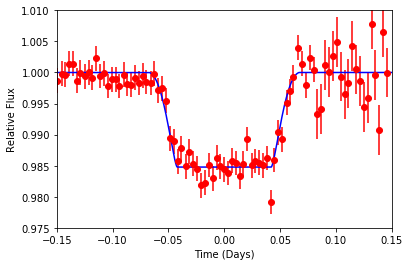

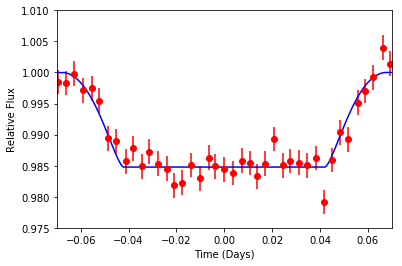

In [6]:
#plot of fits that each use a different method to calculate the best fit values
t = np.linspace(-0.15, 0.15, 1000)     #changes t to a larger number of points to plot so the fit is soother
plt.errorbar(time, data, yerr=data_error, fmt='o', color='red')
color = ['aquamarine', 'magenta', 'gold', 'purple', 'orange', 'red', 'lime', 'navy', 'blue']
#for i, opt_dict in enumerate(opt_list):
#    plt.plot(t, flux(*opt_dict.x), color=color[i])
plt.plot(t, flux(*opt_list[2].x), color='blue')
plt.xlim(-0.15, 0.15)
plt.ylim(0.975, 1.01)
plt.xlabel('Time (Days)')
plt.ylabel('Relative Flux')
plt.show()

plt.errorbar(time, data, yerr=data_error, fmt='o', color='red')
plt.plot(t, flux(*opt_list[2].x), color='blue')
plt.xlim(-0.07, 0.07)
plt.ylim(0.975, 1.01)
plt.xlabel('Time (Days)')
plt.ylabel('Relative Flux')
plt.show()
plt.show()

In [7]:
orb_v = np.sqrt((constants.G*1.1*1.988E30)/(opt_list[3]['x'][1]*1.12*6.957E8))/1000  #orbital speed calculation
orb_v_err = 229.011129545706*0.0048*np.sqrt(1/(opt_list[3]['x'][1]*1.12)**3)
planet_radius = pr_stel*1.12                                                         #planetary radius in terms of R☉
planet_radius_err = 1.12*pr_stel_err
print('The orbital velocity is estimated to be {orb_v:.3f}km/s with an error of {orbve:.3f}km/s'.format(orb_v=orb_v, orbve=orb_v_err))
print("The planet's radius is estimated to be {pr:.3f}R☉ with an error of {pre:.3f}R☉".format(pr=planet_radius, pre=planet_radius_err))

The orbital velocity is estimated to be 405.382km/s with an error of 0.762km/s
The planet's radius is estimated to be 0.136R☉ with an error of 0.002R☉


In [8]:
avg_stel_radv = -14.765               #stellar radial velocity estimated from radial velocity plot given
avg_stel_radv_err = 0.005
peak_orb_v = -14.68
peak_orb_v_err = 0.005
stel_orb_v = peak_orb_v-avg_stel_radv     #stellar orbital speed using radial velocity from above and the radial velocity plot
stel_orb_v_err = np.sqrt(avg_stel_radv_err**2+peak_orb_v_err**2)
print('The average radial velocity estimated from the radial velocity pahse plot is {asrv:.3f}km/s with an error of {asrve:.3f}km/s'.format(asrv=avg_stel_radv, asrve=avg_stel_radv_err))
print('The stellar orbital speed estimated from the radial velocity plot fit is {sov:.3f}km/s with an error of {sove:.3f}km/s'.format(sov=stel_orb_v, sove=stel_orb_v_err))

The average radial velocity estimated from the radial velocity pahse plot is -14.765km/s with an error of 0.005km/s
The stellar orbital speed estimated from the radial velocity plot fit is 0.085km/s with an error of 0.007km/s


In [10]:
period = opt_list[3]['x'][0]                                      #period calculated by the chi squared fit in the cells above
period_err = 0.015                                                #error is estimated from the plot of the fit
SM_axis = opt_list[3]['x'][1]*1.12                                #semi-major axis calculated by the chie squared fit in the cells above
SM_axis_err = 0.00448                                             #error is estimated from the plot of the fit and mulitplied by 1.12
planet_mass = (1.12*period*stel_orb_v*0.1242)/(2*np.pi*SM_axis)   #planet mass calculation from fitted period and semimajor axis and calculated stellar orbital velocity
planet_mass_err = 0.069552/np.pi*np.sqrt((SM_axis**2*((period**2*stel_orb_v_err**2)+(period_err**2*stel_orb_v**2))+period**2*SM_axis_err**2*stel_orb_v**2)/SM_axis**4)
print('The best fit for the period seems to be {p:.3f} days with an estimated error of {pe:.3f} days'.format(p=period, pe=period_err))
print('The best fit for the semi-major axis seems to be {a:.3f}R☉ with an estimated error of {ae:.3f}R☉'.format(a=SM_axis, ae=SM_axis_err))
print('The mass of the planet is estimated to be {pm:.6f}M☉ with an error of {pme:.6f}M☉'.format(pm=planet_mass, pme=planet_mass_err))

The best fit for the period seems to be 0.302 days with an estimated error of 0.015 days
The best fit for the semi-major axis seems to be 1.277R☉ with an estimated error of 0.004R☉
The mass of the planet is estimated to be 0.000445M☉ with an error of 0.000043M☉


In [12]:
planet_density = (planet_mass*(1.988E33))/(4/3*np.pi*(planet_radius*6.957E10)**3)   #planet density from mass and volume
planet_density_err = 13.2841229983719/np.pi*np.sqrt(((planet_mass**2*planet_radius_err**2)+(0.111111111111111*planet_radius**2*planet_mass_err**2))/planet_radius**8)
print('The density of the planet is estimated to be {pd:.3}g/cm^3 with an error of {pde:.4f}g/cm^3'.format(pd=planet_density, pde=planet_density_err))

The density of the planet is estimated to be 0.248g/cm^3 with an error of 0.0264g/cm^3


In [13]:
#calculation of the inclination
time = [-0.149635036,-0.145620438,-0.142335766,-0.139051095,-0.13540146,-0.128832117,-0.125182482,-0.121167883,-0.118613139,-0.131751825,-0.11459854,-0.110948905,-0.10729927,-0.104379562,-0.100729927,-0.097080292,-0.094160584,-0.090145985,-0.086861314,-0.083576642,-0.079927007,-0.076642336,-0.072992701,-0.069708029,-0.066058394,-0.062773723,-0.055474453,-0.059124088,-0.052189781,-0.048540146,-0.045255474,-0.038321168,-0.041240876,-0.034306569,-0.031386861,-0.027737226,-0.024087591,-0.021167883,-0.017518248,-0.013868613,-0.010218978,-0.006569343,-0.003649635,-2.78E-17,0.003649635,0.00729927,0.010583942,0.013868613,0.041605839,0.017153285,0.02080292,0.024452555,0.027372263,0.031386861,0.034671533,0.038321168,0.044890511,0.051824818,0.048540146,0.055839416,0.058759124,0.062043796,0.069343066,0.066423358,0.076642336,0.080291971,0.073722628,0.083576642,0.086861314,0.090510949,0.09379562,0.097810219,0.100729927,0.104379562,0.108029197,0.110948905,0.11459854,0.117883212,0.12189781,0.125182482,0.128832117,0.13540146,0.139051095,0.145985401,0.142335766,0.132116788]
t = np.array(time)
data = [0.99870725,0.999799373,0.999628065,1.00139496,1.001391885,0.999953764,0.999360801,1.000031575,0.999186726,0.99869218,1.00230132,0.999433076,0.999851349,0.997826417,0.998918847,0.998915771,0.997817805,0.999668355,0.998148733,0.998061695,0.999154125,0.998308661,0.99948536,0.998471357,0.998299742,0.999813828,0.997448126,0.997114123,0.995422886,0.989436664,0.988928279,0.987826929,0.985722648,0.984874108,0.987231198,0.98528992,0.984528418,0.981829328,0.982247601,0.985109694,0.982999877,0.986283318,0.984932543,0.98442385,0.983830887,0.985766013,0.985426167,0.983316657,0.97916407,0.985336361,0.98929396,0.985077401,0.985749098,0.985492906,0.985068789,0.986245489,0.985902875,0.989267818,0.990366091,0.995163311,0.997014783,0.999203026,1.001387886,1.004002706,1.002392971,1.000451694,0.99792914,0.993286004,0.994125933,1.001201509,1.000103235,1.002627942,1.004900763,0.999335889,0.996467645,0.998234848,1.004214918,1.000504285,0.99864697,0.994430718,0.995944497,0.999562556,0.990795436,0.999974986,1.006466825,1.007739482]
data_error = [0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004]

lowinc_list = [80., 82.]             #values of inclination
highinc_list = [84., 86., 88., 90.]
x0_low = [1, 4]                      #initial values for 80, 82 inclinations
x0_high = [3, 10]                    #initial values for 84-90 inclinations
opt_inc_list = []
for i in range(len(lowinc_list)):
    params.inc = lowinc_list[i]
    print('Inclination:', params.inc, 'Degrees')
    opt_inc_dict = {}
    for method in method_list:                        #same process as the chi squared fit from previous cells, but cycles through the lower inclination list
        value = minimize(Xsq,x0_low,method=method)
        opt_inc_dict[method] = value
        print(method, 'Optimized Values:',*value.x)
        print('Chi squared value for', method, 'optimized value:',trial_Xsq(*value.x))
        print()
    opt_inc_list.append(opt_inc_dict)
    print('-----------------------------------------------')
    print()
for j in range(len(highinc_list)):
    params.inc = highinc_list[j]
    print('Inclination:', params.inc, 'Degrees')
    opt_inc_dict = {}
    for method in method_list:                       #same process as the chi squared fit from previous cells, but cycles through the higher inclination list
        value = minimize(Xsq,x0_high,method=method)
        opt_inc_dict[method] = value
        print(method, 'Optimized Values:',*value.x)
        print('Chi squared value for', method, 'optimized value:',trial_Xsq(*value.x))
        print()
    opt_inc_list.append(opt_inc_dict)
    print('-----------------------------------------------')
    print()

Inclination: 80.0 Degrees
Nelder-Mead Optimized Values: 1.4925601877993855 3.6190314933384986
Chi squared value for Nelder-Mead optimized value: 73.84005516843963

Powell Optimized Values: 1.4940078681624753 3.6210053846313586
Chi squared value for Powell optimized value: 73.84008298233239

CG Optimized Values: 1.4925525378439826 3.619018545215405
Chi squared value for CG optimized value: 73.84005516204869

BFGS Optimized Values: 1.492538486313507 3.618998876106489
Chi squared value for BFGS optimized value: 73.84005516364985

L-BFGS-B Optimized Values: 1.4925388051138604 3.6189992693190303
Chi squared value for L-BFGS-B optimized value: 73.84005516357263

TNC Optimized Values: 1.46557336238275 3.5837906559873423
Chi squared value for TNC optimized value: 73.8587618776472

COBYLA Optimized Values: 1.5412714528164424 3.686330123474919
Chi squared value for COBYLA optimized value: 73.87260179936803

SLSQP Optimized Values: 1.4925710383822113 3.6190580664531353
Chi squared value for SLSQP

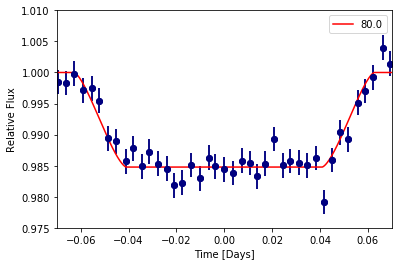

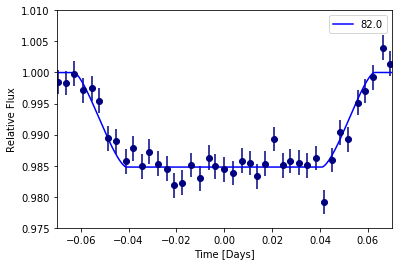

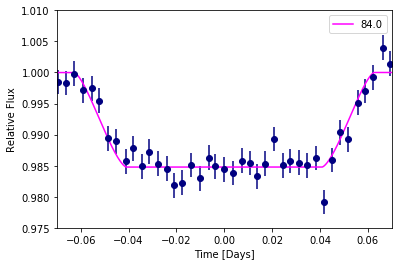

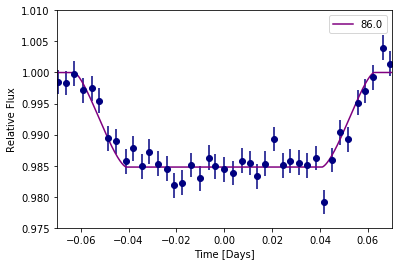

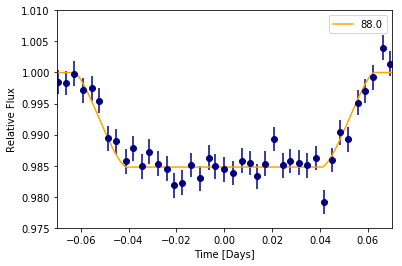

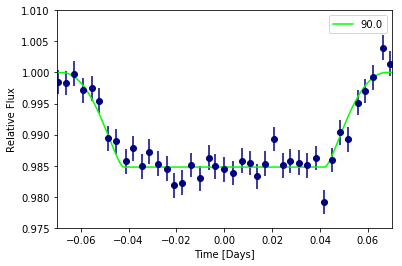

In [15]:
#light curve fits for each inclination given
t = np.linspace(-0.15, 0.15, 1000)
plt.errorbar(time, data, yerr=data_error, fmt='o', color='navy')
colors = ['red', 'blue', 'magenta', 'purple', 'orange', 'lime']
inc_list = [80., 82., 84., 86., 88., 90.]
for i, opt_dict in enumerate(opt_inc_list):
    params.inc = inc_list[i]
    plt.errorbar(time, data, yerr=data_error, fmt='o', color='navy')
    plt.plot(t, flux(*opt_dict["CG"].x), color=colors[i], label=inc_list[i])
    plt.legend()
    plt.xlim(-0.07, 0.07)
    plt.ylim(0.975, 1.01)
    plt.ylabel('Relative Flux')
    plt.xlabel('Time [Days]')
    plt.show()